<a href="https://colab.research.google.com/github/aryanpatel99/GEN-AI-PRACTICE/blob/main/Copy_of_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA PREPROCESSING IN MACHINE LEARNING

**Handling Missing Values • Feature Scaling • Data Encoding**

**Student Name:** _______________________________

**Branch / Year:** __________________________

**Date:** _____________________

**The Golden Rule:** "A simple model with clean data is better than an advanced model with messy & unclean data."

**WHY PREPROCESSING MATTERS?**
- Machine Learning is based on data. Think of a model like a car engine. Data is the fuel. If you put dirty, contaminated fuel into a Ferrari, the engine will break. Similarly, if you feed missing values or bad data into a powerful AI model, it will fail.

## THE SCENARIO (WHY PREPROCESSING MATTERS)

### Real-World Scenario

You are the **Chief Data Scientist** at **MediPredict AI**, a company deploying a machine-learning system to classify **patient risk levels** in emergency hospitals.

The ML model architecture is strong — but predictions are **unreliable and unsafe**.

After investigation, you discover the real issue:

> *The data is messy, incomplete, and unprocessed.*

Your responsibility is to **prepare the data correctly before any model is trained**.

### Raw Patient Data

| Patient ID | Age  | Income (₹) | City    | Blood Pressure | Risk Level |
| ---------- | ---- | ---------- | ------- | -------------- | ---------- |
| P101       | 25   | 25000      | Delhi   | 120            | Low        |
| P102       | NULL | 800000     | Mumbai  | 140            | High       |
| P103       | 60   | 30000      | Chennai | NULL           | High       |
| P104       | 35   | 45000      | Delhi   | 130            | Low        |
| P105       | 40   | NULL       | Mumbai  | 125            | Low        |

### Identify Data Problems (Tick all that apply)

- [ ] Missing Age values affect risk prediction
- [ ] Missing Income values distort patterns
- [ ] Missing Blood Pressure values hide health signals
- [ ] Income scale dominates other features
- [ ] City is categorical and unreadable to ML

**Reflection**

Why can’t this raw data be directly used to train a machine-learning model?

=> ml can handle the null values, give higher weightage to higher altitude

### Exercise 1 — Handling Missing Values (Fleet example)

**The Scenario:** You are the Fleet Manager. You need to guess the Odometer reading (KM) for a truck where the data is missing. If your guess is too high, you waste money on unnecessary servicing. If it's too low, the truck might break down.

* The Data (Current Fleet):

| Truck ID    | Distance Travelled (KM) | Notes                                               |
| ----------- | ----------------------- | --------------------------------------------------- |
| Truck A     | 20,000                  | Regular usage                                       |
| Truck B     | 25,000                  | Regular usage                                       |
| Truck C     | 22,000                  | Regular usage                                       |
| **Truck D** | **1,000,000**           | **Extreme outlier (old truck from another branch)** |
| Truck E     | **NULL**                | Missing data (new truck)                            |


In [ ]:
# Fleet example: compute mean and median
import numpy as np

truck_readings = np.array([20000, 25000, 22000, 1000000])  # Outlier present

mean_val = truck_readings.mean()

median_val = np.median(truck_readings)

mean_val, median_val

(np.float64(266750.0), np.float64(23500.0))

**Task 1 results:**
- Mean (with outlier) -> much larger than typical truck readings.
- Median -> robust to the extreme 1,000,000 KM truck.

**Task 2:** Which guess is more representative?
- Usually the median in presence of outliers.

**Task 3** — Strategy Selection:

| If your data…                                             | Best Strategy             | Reason                                                               |
| --------------------------------------------------------- | ------------------------- | -------------------------------------------------------------------- |
| Is fairly consistent (no huge jumps)                      | Mean                      | Use the standard average since values are evenly distributed.        |
| Has extreme outliers (one very large or very small value) | Median                    | The middle value is not affected by extreme (“freak”) numbers.       |
| Is categorical (e.g., *City* name)                        | Mode                      | Text categories cannot be averaged; the most frequent value is used. |
| Is the **Target Label** (the value to be predicted)       | Keep / Drop with caution  | Never guess the final answer the model is trying to learn.           |

## ML TRAINING DATA

### Historical Training Data

| Age  | Income (₹) | City    | Risk Level |
| ---- | ---------- | ------- | ---------- |
| 25   | 25000      | Delhi   | Low        |
| NULL | 40000      | Delhi   | Low        |
| 55   | 30000      | Chennai | High       |
| 45   | NULL       | Mumbai  | High       |
| 35   | 45000      | Delhi   | Low        |

Choose the most appropriate strategy for Patient data :

| Column     | Strategy                     |
| ---------- | ---------------------------- |
| Age        | --                     |
| Income     | --                     |
| City       | --                      |
| Risk Level | --                      |

**LOADING THE DATA**
- Before we can clean anything, we must import our toolkit
- Pandas is used for data manipulation (tables), and NumPy handles the math

In [ ]:
import pandas as pd
import numpy as np

# Creating data that matches your worksheet modules
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Edward', 'Fiona', 'George', 'Elon Musk'],
    'Age': [25, 30, 35, 40, 45, 22, 55, 51],
    'Income': [50000, 60000, np.nan, 80000, 75000, np.nan, 90000, 10000000], # Missing values & Outlier
    'Education': ['B.Tech', 'M.Tech', 'PhD', 'B.Tech', np.nan, 'M.Tech', 'PhD', 'PhD'], # Missing value
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male'], # Categorical
    'Loan_Status': ['Approved', 'Approved', 'Rejected', 'Approved', 'Rejected', 'Approved', 'Rejected', 'Approved']
}

df = pd.DataFrame(data)

# This creates the actual CSV file needed for Module 1
df.to_csv('loan_data.csv', index=False)
print("File 'loan_data.csv' has been created successfully!")

File 'loan_data.csv' has been created successfully!


In [ ]:
# Load the dataset
df = pd.read_csv('loan_data.csv')

# Print the first few rows
df

,Name,Age,Income,Education,Gender,Loan_Status
0,Alice,25,50000.0,B.Tech,Female,Approved
1,Bob,30,60000.0,M.Tech,Male,Approved
2,Charlie,35,NaN,PhD,Male,Rejected
3,Diana,40,80000.0,B.Tech,Female,Approved
4,Edward,45,75000.0,NaN,Male,Rejected
5,Fiona,22,NaN,M.Tech,Female,Approved
6,George,55,90000.0,PhD,Male,Rejected
7,Elon Musk,51,10000000.0,PhD,Male,Approved


**HANDLING MISSING VALUES**
PART 1: IDENTIFYING THE HOLES
We use code to find errors quickly instead of scanning thousands of rows visually.


Step 1: Get a Summary of Data The info() function tells us how many non-null values exist in every column.

In [ ]:
# Get summary of data types and non-null counts

Step 2: Count Specific Missing Values The isnull().sum() function gives us the exact count of missing cells per column.

In [ ]:
# Count missing values in each column

**OBSERVATION & REFLECTION**
Look at the output. Which column has missing values?

Answer: __________________________________________________

Which command is better for quickly identifying which column has missing data?

[ ] df.info()

[ ] df.isnull().sum()

Explain your choice. Why is that command better?

**PART 2: STRATEGIES TO FIX MISSING VALUES**
We have three common strategies to fix missing data:

* Strategy A: Dropping Rows (The "Nuclear" Option)
  - If you have thousands of records and only a few are empty, you can delete the rows with missing info.

In [ ]:
# Drop any row that contains missing values


# View result
#df_dropped

* Strategy B: Filling with Mean (The "Average")
  - If the data is normally distributed (no extreme outliers), fill the blank with the average.

In [ ]:
# Calculate the Mean (Average Value)
mean_val = df['Income'].mean()

#create copy of your data
df1 = df.copy()

# Fill NaN values with the Median


* Strategy C: Filling with Median (The "Outlier-Proof" Option)
  * If the dataset includes an outlier (like Elon Musk with an income of 10,000,000), the Mean is skewed too high! In this case, the Median (middle value) is a safer choice

In [ ]:
# Calculate the Median (Middle Value)
median_val = df['Income'].median()

#create copy of your data
df2 = df.copy()

# Fill NaN values with the Median

**SUMMARY: WHEN TO USE WHICH STRATEGY?**

  - Drop Rows: Use when you have a massive dataset and very few missing values.
  - Fill with Mean: Use when data is normally distributed (symmetric) with no outliers.
  - Fill with Median: Use when data is skewed or contains outliers.

**REMOVING OUTLIERS**
  * 1. What is an Outlier?
    * Definition: A data point that differs significantly from other observations. It is an anomaly—like a student scoring 1000% on a test.

  * Critical Thinking: Why should we remove an extreme outlier like Elon Musk ($10 Million) before training a model on average student incomes?

* 2. The IQR MethodThe Interquartile Range (IQR) method helps mathematically decide what is "too big" or "too small"
  - Exercise: Calculate
    - Look at the Income column in your dataset:
      - Step A: Arrange all 8 income values in Ascending Order.
      - Step B: Count total values (N). N = ______
      - Step C: Find the 25th Percentile (Q1). (2nd value in sorted list). Q1 = ______
      - Step D: Find the 75th Percentile (Q3). (6th value in sorted list). Q3 = ______
      - Step E: Calculate IQR ($Q3 - Q1$). IQR = ______
      - Step F: Calculate the Allowed Range (The Fences)     
        - Lower Range = $Q1 - (1.5 * IQR)$ = ______
        - Upper Range = $Q3 + (1.5 * IQR)$ = ______
      - **Conclusion:** Is Elon Musk (10,000,000) greater than your Upper Range?
        - [ ] YES (Remove him)
        - [ ] NO (Keep him)

**Code Implementation**

In [ ]:
# 1. Calculate Q1 (25%) and Q3 (75%)


# 2. Calculate IQR


# 3. Define the Upper and Lower Limits


# 4. Filter the data (Keep only valid rows)
#df_clean = df[(df['Income'] >= lower_limit) & (df['Income'] <= upper_limit)]
#df_clean

****
****

### **Exercise 2 — Feature Scaling**

If you plot Age (20-60) on x-axis and Income (25,000-800,000) on y-axis, Income will dominate distance-based calculations. Therefore scale Age and Income.


**Task:** Visualizing Scale Dominance Imagine plotting Age (x-axis) and Income (y-axis).
  * Age range: 20 to 60.
  * Income range: 25,000 to 800,000.

Q: If a model calculates the distance between two patients, which feature will "pull" the distance more?

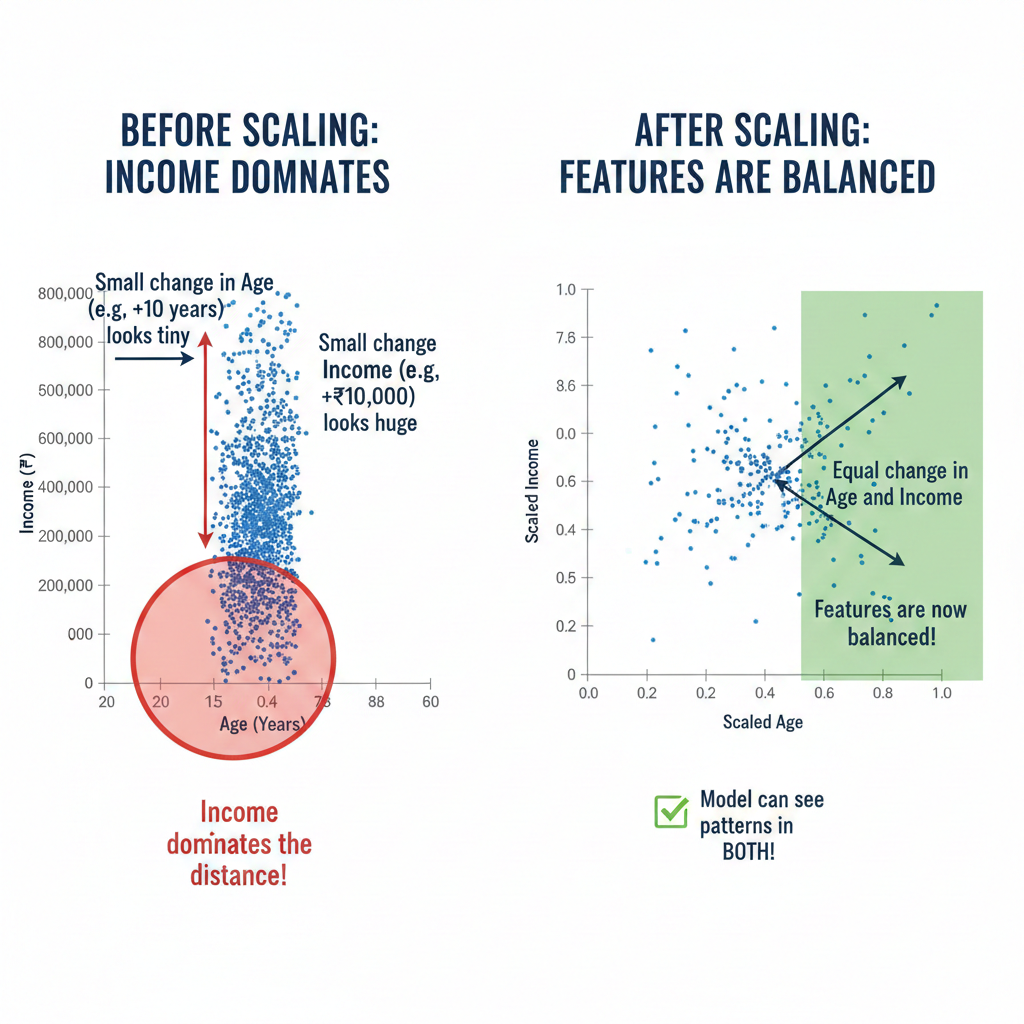

**The Size Problem (Bias)**
 * The Bias Problem occurs because Machine Learning models naturally become biased toward larger numbers. The computer does not inherently understand that a small number (like age) might be just as important as a large number (like Income).

  * Example Case:
    - Income: 50000
    - Age: 25

 * The Issue: Because 50000 is mathematically much larger than 25, the model may incorrectly assume Income is 2000 times more important than Age.

 * The Solution: We use Min-Max Scaling to shrink all columns so they fit within a shared range, typically between 0 and 1.

**Exercise:** Normalization (Min-Max)
  * We use a mathematical formula to "squash" any value into the 0–1 range:$$New\ Value = \frac{Value - Min}{Max - Min}$$**Scenario**: In our dataset, the Minimum Income is 3000 and the Maximum Income is 7000.

**Task A:**
Scale a Middle Class Income (5000)
* $New\ Value = \frac{5000 - 3000}{7000 - 3000}
$$New\ Value = \frac{2000}{4000}
$Answer: 0.5

**Task B:** Scale the Poorest Income (3000)
* $New\ Value = \frac{3000 - 3000}{4000} $Answer: 0.0

**Task C:** Scale the Richest Income (7000)$New\ Value = \frac{7000 - 3000}{4000}$Answer: 1.0

In [ ]:
# 1. Create a dataset with huge differences in scale

In [ ]:
# 2. Scaling (Min-Max used here to get a perfect 0-1 range)

In [ ]:
# 3. Data Plotting before scaling

In [ ]:
# 4. Data Plotting after scaling

Which columns require scaling?
- [ ] Age
- [ ] Income
- [ ] City
- [ ] Risk Level

Why is feature scaling necessary?
- To prevent feature dominance when features have different units/ranges.

### **Exercise 3 — Data Encoding**

Numeric math with text (e.g., adding a number to a city name) is impossible.
 - We show two encoding approaches: **integer mapping** and **one-hot encoding.**

**The Scenario:** You are trying to calculate the
 - "Priority Score" for a patient.
 - Your formula is:
   * Priority Score = (Age × 0.5) + City

   * **Task 1:** The Calculation Trap Try to calculate the score for this patient:
     - Patient: Age 40, City: "Delhi"
     - Calculation: (40 × 0.5) + "Delhi" = ?
    
   * **Q:** Can you complete the math?
     - [ ] Yes
     - [ ] No, because you cannot add a number to a word.

  * The Manual Encoding Fix To fix this, we assign a "Numerical Identity" to each city:
    * Delhi = 1
    * Mumbai = 2
    * Chennai = 3
  * Now, recalculate for the same patient (Age 40, City: Delhi):
    - Calculation: (40 × 0.5) + 1 = _______________ (Your Result)

  * The "Integer encoding or Label Encoding" Problem
    - If we use 1, 2, and 3, the computer might think Mumbai (2) is "twice as much" as Delhi (1).
    - To prevent the computer from thinking one city is "greater" than another, we use One-Hot Encoding.

  * Look at the table below:

| City    | Is_Delhi? | Is_Mumbai? | Is_Chennai? |
| --------| --------- | ---------- | ----------- |
| Delhi   |    1      |    0       |     0       |
| Mumbai  |    0      |    1       |     0       |
| Chennai |    0      |    0       |     1       |

    - In this new table, is any city "mathematically larger" than the others?

**Conclusion:** Encoding is required because:
- Computers are Calculators: They only understand numbers (0s and 1s).
- Neutrality: One-Hot Encoding ensures the model doesn't assume a "ranking" where one category is better than another.



In [ ]:
# Encoding demonstration - Integer encoding
cities = ['Delhi', 'Mumbai', 'Chennai']
df_c = pd.DataFrame({'City': cities})
df_c

,City
0,Delhi
1,Mumbai
2,Chennai


In [ ]:
#Label or Integer encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encoding demonstration - One hot encoding

One-hot encoding prevents the model from inferring an ordinal relationship between categories.

Which feature must be encoded before training?
- [ ] Age
- [ ] Income
- [ ] City
- [ ] Risk Level (if already represented as strings — but if this is target, encoding to numbers may be needed for some algorithms)

## HANDS-ON: PANDAS DATAFRAME & MISSING VALUES

Create the DataFrame, detect missing values, and handle them using median imputation (as discussed).

In [ ]:
import pandas as pd

data = {
    "Age": [25, None, 55, 45, 35],
    "Income": [25000, 40000, 30000, None, 45000],
    "City": ["Delhi", "Delhi", "Chennai", "Mumbai", "Delhi"],
    "Risk_Level": ["Low", "Low", "High", "High", "Low"]
}

df = pd.DataFrame(data)
df

,Age,Income,City,Risk_Level
0,25.0,25000.0,Delhi,Low
1,NaN,40000.0,Delhi,Low
2,55.0,30000.0,Chennai,High
3,45.0,NaN,Mumbai,High
4,35.0,45000.0,Delhi,Low


In [ ]:
# Detect missing values
df.isnull()


,Age,Income,City,Risk_Level
0,False,False,False,False
1,True,False,False,False
2,False,False,False,False
3,False,True,False,False
4,False,False,False,False


In [ ]:
df.isnull().sum()


,0
Age,1
Income,1
City,0
Risk_Level,0


Write the number of missing values in each column above (use the previous cell output).

In [ ]:
# Handle missing values using median imputation for numeric columns

Why is median often preferred over mean?
- Median is robust to outliers; mean can be skewed by extreme values.

### FEATURE SCALING, ENCODING & NEW DATA

Apply StandardScaler to numeric columns and encode categorical City using get_dummies.

In [ ]:
# Perform data scaling

In [ ]:
# Encoding City using get_dummies (drop_first=False to keep full one-hot representation)

Why can’t ML models work directly with text data?
- Models operate on numerical arrays; text must be converted to numbers. Raw text cannot be used in typical numeric algorithms.

## THE BIG PICTURE — AI / ML / DL HIERARCHY

| Level                   | Description                           |
| ----------------------- | ------------------------------------- |
| Artificial Intelligence | Machines mimicking human intelligence |
| Machine Learning        | Learning patterns from data           |
| Deep Learning           | Neural-network-based ML               |
| **Data Preprocessing**  | **Foundation for all ML systems**     |

## FINAL SELF-CHECK

- [ ] I understand labelled vs unlabelled data
- [ ] I can handle missing values using Pandas
- [ ] I can scale numerical features
- [ ] I can encode categorical data
- [ ] I understand why preprocessing is critical

## Final Takeaway

> **“Machine learning models don’t fail first — data does.”**